### ■総合問題2-1 モンテカルロ法

乱数を発生させる方法を使って、円周率を求めるプログラムを作成してみましょう。なお、このアプローチを**モンテカルロ法**といいます。

（1）区間`[0,1]`上の一様分布に従う乱数を2組発生させて、それぞれ10,000個の一様乱数を作ってみましょう。
なお、一様乱数とは、ある数から数まで等確率で発生する乱数のことです。`np.random.uniform`を使います。たとえば、`np.random.uniform(0.0, 1.0, 10)`とすると、0～1までの範囲の一様乱数を10個発生できます。

（2）$x−y$軸を使った中心$(0,0)$、半径1の円と、長さ1の正方形を考えます。このとき円の面積は$\pi$となり、正方形の面積は1となります。ここで先ほどの$x$と$y$の組み合わせの乱数10000個のうち、円の内部に入る点は何組あるでしょうか。

ここで、円の内部に入るとは、$x−y$座標の原点から点$ (x, y) $のベクトルの長さを求め、それが1より小さくなる場合を判定基準とします。その長さを求めるために、ユークリッドノルム($\sqrt{x^2 + y^2}$)を使います。Pythonでは、 `math.hypot(x,y)`で計算できます。さらに余裕があれば、円の中に入った$x$と$y$の組み合わせと外に出た$x$と$y$の組み合わせをプロットして図にしてみましょう。


（3）半径1の1/4の円の面積と長さ1の正方形の面積の比は、$ \pi /4 : 1$となりますので、これと先ほどの結果を利用して、円周率を求めてみましょう。

In [1]:
# (1)
# 以下のライブラリを使う
import numpy as np
import numpy.random as random
import scipy as sp

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline


In [2]:
data=[ np.random.uniform(0.0, 1.0, 10000), np.random.uniform(0.0, 1.0, 10000) ]

できたデータを表示してみる

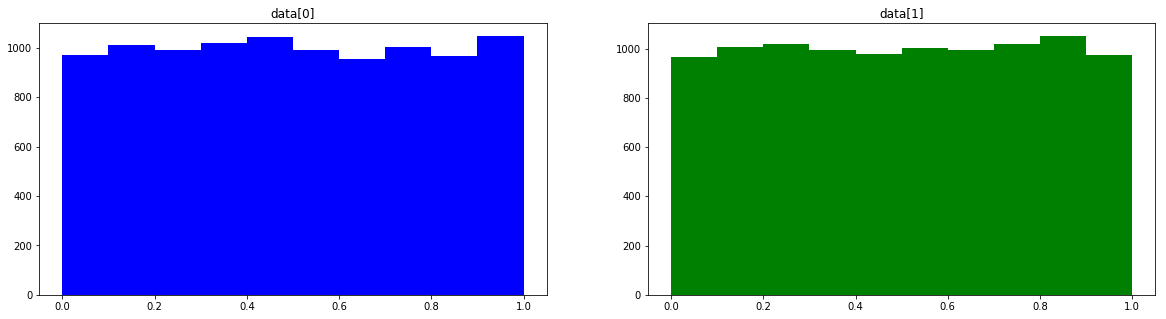

In [8]:
# それぞれのデータのヒストグラム
plt.figure(figsize=(20,5))
col=['blue','green']
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.hist(data[i], bins=10, color=col[i])
    plt.title('data[{}]'.format(i))


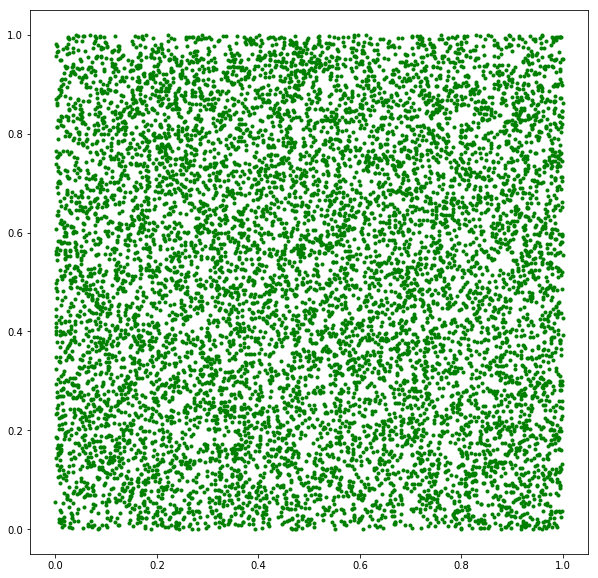

In [5]:
# 2次元で表示
plt.figure(figsize=(10,10))
plt.plot(data[0],data[1],'g.')

In [15]:
# (2)
# 円の内部の点（インデックス）のリスト（円周上の点も含めるとする）
pointsInsideCircle=[i for i in range(10000) if data[0][i] **2 + data[1][i] ** 2 <= 1.0]
print("個数={}".format(len(pointsInsideCircle)))

個数=7847


In [16]:
# mathのhypotを使ったバージョン
import math
pointsInsideCircle2=[i for i in range(10000) if math.hypot(data[0][i], data[1][i]) <= 1.0]
print("個数={}".format(len(pointsInsideCircle)))

個数=7847


In [17]:
# わかりやすさのため円の外部の点も計算しておく
poinstOutsideCircle = [i for i in range(10000) if not i in pointsInsideCircle]

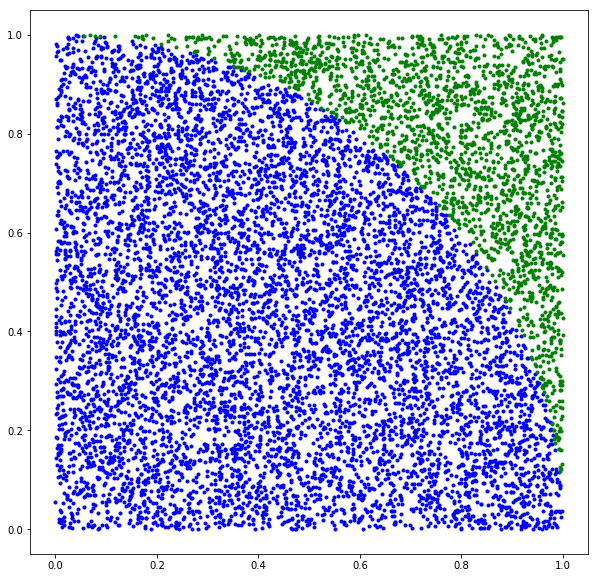

In [18]:
# 描画 (円周はわざと表示させていない)
plt.figure(figsize=(10,10))
plt.plot([data[0][i] for i in pointInCircle], [data[1][i] for i  in pointInCircle],'b.')
plt.plot([data[0][i] for i in pointOutCircle],  [data[1][i] for i  in pointOutCircle], 'g.')

$Number\ of\ PointsInsideCircle : 1.0 = \frac{\pi}{4} : 1.0$

In [22]:
# (3)
pi_10000 = 4.0 * (len(pointsInsideCircle)/10000)
print("Estimated π ={} (samples #=10000)".format(pi_10000))

Estimated π =3.1388 (samples #=10000)


追加問題：サンプル数を引数として円周率の近似値を求める関数pi_estimateを作る

In [23]:
import math
def pi_estimate(N):
    data=[ np.random.uniform(0.0, 1.0, N), np.random.uniform(0.0, 1.0, N) ]
    pointsIn = [i for i in range(N) if math.hypot(data[0][i], data[1][i]) <= 1.0]
    return(4.0 * len(pointsIn) / N)

In [24]:
for i in range(1,9):
    n=10**i # 10**9, 10**10 は時間がかかりすぎて断念
    print("サンプル数={} 円周率の近似値={}".format(n, pi_estimate(n)) ) 

サンプル数=10 円周率の近似値=4.0
サンプル数=100 円周率の近似値=3.12
サンプル数=1000 円周率の近似値=3.104
サンプル数=10000 円周率の近似値=3.1148
サンプル数=100000 円周率の近似値=3.14728
サンプル数=1000000 円周率の近似値=3.143664
サンプル数=10000000 円周率の近似値=3.1422116
サンプル数=100000000 円周率の近似値=3.1415836


In [26]:
# 比較
np.pi

3.141592653589793